# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
import numpy as np



%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
crypto_asset_data = {
    "QTY": [1.2, 5.3]
}

# Set the tickers
tickers = ["BTC", "ETH"]

# Create the shares DataFrame with `tickers` as index
df_crypto_asset = pd.DataFrame(crypto_asset_data, index=tickers)

# Display shares data
df_crypto_asset

,QTY
BTC,1.2
ETH,5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url)

# Fetch current ETH price
eth_response_data = requests.get(eth_url)

#storing requests content in variables
btc_response_content = btc_response_data.content
btc_data = btc_response_data.json()

eth_response_content = eth_response_data.content
eth_data = eth_response_data.json()

# Using json.dumps with argument indent=4 to format and view fetched data
print(json.dumps(btc_data, indent=4))
print(json.dumps(eth_data, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18892556,
            "total_supply": 18892556,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 48958.0,
                    "volume_24h": 31911473416,
                    "market_cap": 924779748100,
                    "percentage_change_1h": -0.325765594443383,
                    "percentage_change_24h": -0.387590124960734,
                    "percentage_change_7d": -14.4660215859535,
                    "percent_change_1h": -0.325765594443383,
                    "percent_change_24h": -0.387590124960734,
                    "percent_change_7d": -14.4660215859535
                },
                "CAD": {
                    "price": 62793.5308,
                    "volume_24h": 40929655803.3616,
               

In [6]:
#df_crypto_price = pd.DataFrame()
#df_crypto_price ["BTC"] = btc_data["data"]["1"]["quotes"]["CAD"]["price"]
#df_crypto_price ["ETH"] = eth_data["data"]["1027"]["quotes"]["CAD"]["price"]
#df_crypto_price.index = df_crypto_price.index.date
#df_crypto_price.head()

In [16]:
crypto_asset_data = {
    "QTY": [1.2, 5.3],
    "Price": [btc_data["data"]["1"]["quotes"]["CAD"]["price"], eth_data["data"]["1027"]["quotes"]["CAD"]["price"] ]
}

# Set the tickers
tickers = ["BTC", "ETH"]

# Create the shares DataFrame with `tickers` as index
df_crypto_asset = pd.DataFrame(crypto_asset_data, index=tickers)

# Display shares data
df_crypto_asset

,QTY,Price
BTC,1.2,62793.530800
ETH,5.3,5333.474058


In [17]:
df_crypto_asset.loc["ETH"]["Price"]

5333.474058

In [18]:
# Compute current value of my crpto
my_btc = float(df_crypto_asset.loc["BTC"]["QTY"])
my_btc_value = float(df_crypto_asset.loc["BTC"]["Price"] * my_btc)

my_eth = float(df_crypto_asset.loc["ETH"]["QTY"])
my_eth_value = float(df_crypto_asset.loc["ETH"]["Price"] * my_eth)

In [19]:
#Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:,.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:,.2f}")

The current value of your 1.2 BTC is $75,352.24
The current value of your 5.3 ETH is $28,267.41


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [20]:
# Set current amount of shares
#my_agg = 200
#my_spy = 50

shares_data = {
    "QTY": [201, 51]
}   

# Set the tickers
share_tickers = ["AGG", "SPY"]

# Create the shares DataFrame with `tickers` as index
df_share_data = pd.DataFrame(shares_data, index=share_tickers)

df_share_data

,QTY
AGG,201
SPY,51


In [21]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

# Create the Alpaca API object
# YOUR CODE HERE!

In [22]:
# Format current date as ISO format
today = pd.Timestamp("2021-12-02", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start=today,
    end=today,
    limit = 1000
).df

# Preview DataFrame
df_ticker.head()

AGG                                        SPY  \
                             open    high       low   close   volume    open   
time                                                                           
2021-12-02 00:00:00-05:00  114.67  114.79  114.4001  114.61  7507924  450.72   

                                                              
                             high     low   close     volume  
time                                                          
2021-12-02 00:00:00-05:00  459.07  450.31  457.38  109873511

In [23]:
# Pick AGG and SPY close prices
df_share_prices = pd.DataFrame()
df_share_prices["AGG"] = df_ticker["AGG"]["close"]
df_share_prices["SPY"] = df_ticker["SPY"]["close"]
df_share_prices.index = df_share_prices.index.date
df_share_prices.head()



,AGG,SPY
2021-12-02,114.61,457.38


In [24]:
# Print AGG and SPY close prices
agg_close_price = float(df_share_prices["AGG"])
spy_close_price = float(df_share_prices["SPY"])

print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.61
Current SPY closing price: $457.38


In [25]:
# Compute the current value of shares
my_spy = float(df_share_data.loc["SPY"])
my_spy_value = float(df_share_prices["SPY"] * my_spy)

my_agg = float(df_share_data.loc["AGG"])
my_agg_value = float(df_share_prices["AGG"] * my_agg)

In [26]:

#my_agg = float(df_share_qty.loc["AGG"])
#my_agg_value = round(float(df_share_prices["AGG"] * my_agg                          

#my_spy_value = spy_close_price * my_spy
#my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:,.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:,.2f}")

The current value of your 51.0 SPY shares is $23,326.38
The current value of your 201.0 AGG shares is $23,036.61


### Savings Health Analysis

In [27]:
# Set monthly household income
monthly_income = 12000

In [28]:
# Consolidate financial assets data
df_savings = pd.DataFrame(columns = ["Amount"], index = ["Crypto", "Shares"])
df_savings.loc["Crypto"] = round(my_btc_value + my_eth_value,2)
df_savings.loc["Shares"] = round(my_agg_value + my_spy_value,2)

df_savings.head()

# Create savings DataFrame
# YOUR CODE HERE!

# Display savings DataFrame
#display(df_savings)

,Amount
Crypto,103619.65
Shares,46362.99


<AxesSubplot:title={'center':'Portfolio Composition'}, ylabel='Amount'>

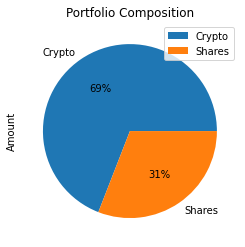

In [29]:
# Plot savings pie chart
df_savings.plot.pie(y="Amount", title="Portfolio Composition", autopct='%1.0f%%')

In [30]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
print(f"Emergency fund should be ${emergency_fund:,.2f}")

Emergency fund should be $36,000.00


In [31]:
# Calculate total mount of savings
total_savings = float(df_savings.loc["Crypto"] + df_savings.loc["Shares"])
print(f"Total Savings from Assets is ${total_savings:,.2f}")

Total Savings from Assets is $149,982.64


In [32]:
# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations! You have enough funds as Emergency Savings")
elif total_savings == emergency_fund:
        print(f"Congratulations! You have achieved your Emergency Savings Goal")
elif total_savings < emergency_fund:
        print(f"You need to save ${total_savings - emergency_fund:,.2f} to achieve the Emergency Savings Goal")
        

Congratulations! You have enough funds as Emergency Savings


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [33]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-12-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-12-01', tz='America/New_York').isoformat()

In [34]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 5 years ago.
start_date = pd.Timestamp("2017-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-01", tz="America/New_York").isoformat()

# Set the ticker information
ticker = ["AGG","SPY"]

# Get approximately 4 year's worth of historical price data
df_stock_data = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit = 1000
).df

# Drop the time component of the date
df_stock_data.index = df_stock_data.index.date

# Display sample data
df_stock_data.head(-1)

AGG                                             SPY          \
              open      high       low    close     volume    open    high   
2017-05-10  108.60  108.6600  108.4400  108.520  1427511.0     NaN     NaN   
2017-05-11  108.35  108.5400  108.3435  108.515  1773499.0  239.35  239.57   
2017-05-12  108.81  108.9400  108.7800  108.920  1136553.0  239.09  239.21   
2017-05-15  108.85  108.9400  108.8200  108.890  1620264.0  239.47  240.44   
2017-05-16  108.88  109.1010  108.8800  109.000  1394153.0  240.62  240.67   
...            ...       ...       ...      ...        ...     ...     ...   
2021-04-23  114.81  115.0860  114.6415  114.750  3506457.0  412.87  418.25   
2021-04-26  114.74  114.8015  114.6500  114.650  2867784.0  417.44  418.22   
2021-04-27  115.13  115.1300  114.3700  114.370  3421667.0  417.91  418.14   
2021-04-28  114.45  114.4685  114.2000  114.440  6185936.0  417.81  419.01   
2021-04-29  114.14  114.3700  114.0900  114.370  5796983.0  420.33  420.72   

                                           
                 low    close      volume  
2017-05-10       NaN      NaN         NaN  
2017-05-11  238.1300  239.410  45435690.0  
2017-05-12  238.6700  239.030  35283567.0  
2017-05-15  239.4500  240.245  42230620.0  
2017-05-16  239.6300  240.100  37206183.0  
...              ...      ...         ...  
2021-04-23  412.7900  416.720  62186191.0  
2021-04-26  416.8111  417.640  44689009.0  
2021-04-27  416.3000  417.480  45962264.0  
2021-04-28  416.9000  417.350  45533863.0  
2021-04-29  416.4400  419.990  70607144.0  

[1000 rows x 10 columns]

In [35]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
stock_30year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Printing the simulation input data
stock_30year.portfolio_data.head(-1)

AGG                                                       \
              open      high       low    close     volume daily_return   
2017-05-10  108.60  108.6600  108.4400  108.520  1427511.0          NaN   
2017-05-11  108.35  108.5400  108.3435  108.515  1773499.0    -0.000046   
2017-05-12  108.81  108.9400  108.7800  108.920  1136553.0     0.003732   
2017-05-15  108.85  108.9400  108.8200  108.890  1620264.0    -0.000275   
2017-05-16  108.88  109.1010  108.8800  109.000  1394153.0     0.001010   
...            ...       ...       ...      ...        ...          ...   
2021-04-23  114.81  115.0860  114.6415  114.750  3506457.0    -0.000174   
2021-04-26  114.74  114.8015  114.6500  114.650  2867784.0    -0.000871   
2021-04-27  115.13  115.1300  114.3700  114.370  3421667.0    -0.002442   
2021-04-28  114.45  114.4685  114.2000  114.440  6185936.0     0.000612   
2021-04-29  114.14  114.3700  114.0900  114.370  5796983.0    -0.000612   

               SPY                                                      
              open    high       low    close      volume daily_return  
2017-05-10     NaN     NaN       NaN      NaN         NaN          NaN  
2017-05-11  239.35  239.57  238.1300  239.410  45435690.0          NaN  
2017-05-12  239.09  239.21  238.6700  239.030  35283567.0    -0.001587  
2017-05-15  239.47  240.44  239.4500  240.245  42230620.0     0.005083  
2017-05-16  240.62  240.67  239.6300  240.100  37206183.0    -0.000604  
...            ...     ...       ...      ...         ...          ...  
2021-04-23  412.87  418.25  412.7900  416.720  62186191.0     0.010720  
2021-04-26  417.44  418.22  416.8111  417.640  44689009.0     0.002208  
2021-04-27  417.91  418.14  416.3000  417.480  45962264.0    -0.000383  
2021-04-28  417.81  419.01  416.9000  417.350  45533863.0    -0.000311  
2021-04-29  420.33  420.72  416.4400  419.990  70607144.0     0.006326  

[1000 rows x 12 columns]

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
np.random.seed(0)

stock_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.


In [ ]:
# Plot simulation outcomes
line_plot_eq30 = stock_30year.plot_simulation()

In [ ]:
# Plot probability distribution and confidence intervals
dist_plot_eq30 = stock_30year.plot_distribution()

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
stock_summary30 = stock_30year.summarize_cumulative_return()

# Print summary statistics
print(stock_summary30)

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower1 = stock_summary30[8]*initial_investment
ci_upper1 = stock_summary30[9]*initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower1:,.2f} and ${ci_upper1:,.2f}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
higher_initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower2 = stock_summary30[8]*higher_initial_investment
ci_upper2 = stock_summary30[9]*higher_initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${higher_initial_investment:,.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower2:,.2f} and ${ci_upper2:,.2f}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
stock_5year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*5
)

# Printing the simulation input data
stock_5year.portfolio_data.head(-1)

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
np.random.seed(0)

stock_5year.calc_cumulative_return()

In [ ]:
# Plot simulation outcomes
line_plot_eq5 = stock_5year.plot_simulation()

In [ ]:
# Plot probability distribution and confidence intervals
dist_plot_eq5 = stock_5year.plot_distribution()

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
stock_summary5 = stock_5year.summarize_cumulative_return()

# Print summary statistics
print(stock_summary5)

In [ ]:
# Set initial investment
initial_5_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = stock_summary5[8]*initial_5_investment
ci_upper_five = stock_summary5[9]*initial_5_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_5_investment:,.2f} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five:,.2f} and ${ci_upper_five:,.2f}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
stock_10year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Printing the simulation input data
stock_10year.portfolio_data.head(-1)

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
np.random.seed(0)

stock_10year.calc_cumulative_return()

In [ ]:
# Plot simulation outcomes
line_plot_eq10 = stock_10year.plot_simulation()

In [ ]:
# Plot probability distribution and confidence intervals
dist_plot_eq10 = stock_10year.plot_distribution()

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
stock_summary10 = stock_10year.summarize_cumulative_return()

# Print summary statistics
print(stock_summary10)

In [ ]:
# Set initial investment
# YOUR CODE HERE!
initial_10_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = stock_summary10[8]*initial_10_investment
ci_upper_ten = stock_summary10[9]*initial_10_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_10_investment:,.2f} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten:,.2f} and ${ci_upper_ten:,.2f}")